In [16]:

# Correlation Analysis: News Sentiment vs Stock Movements
# Comprehensive Analysis Notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import os
import sys

# Add scripts directory to path - FIXED PATH
scripts_path = os.path.join(os.getcwd(), '..', 'scripts')
sys.path.insert(0, scripts_path)

print(f"🔍 Looking for scripts in: {scripts_path}")
print(f"📁 Contents: {os.listdir(scripts_path) if os.path.exists(scripts_path) else 'PATH NOT FOUND'}")

# Import our custom modules
try:
    from data_loader import DataLoader
    from sentiment_analyzer import SentimentAnalyzer
    from correlation_calculator import CorrelationCalculator
    from visualization import StockVisualizer
    print("✅ All custom modules imported successfully!")
except ImportError as e:
    print(f"❌ Import error: {e}")
    print("💡 Trying alternative import...")
    
    # Alternative import method
    import importlib.util
    def import_module_from_path(module_name, file_path):
        spec = importlib.util.spec_from_file_location(module_name, file_path)
        module = importlib.util.module_from_spec(spec)
        spec.loader.exec_module(module)
        return module
    
    # Import each module individually
    data_loader_path = os.path.join(scripts_path, 'data_loader.py')
    sentiment_analyzer_path = os.path.join(scripts_path, 'sentiment_analyzer.py')
    correlation_calculator_path = os.path.join(scripts_path, 'correlation_calculator.py')
    visualization_path = os.path.join(scripts_path, 'visualization.py')
    
    if os.path.exists(data_loader_path):
        data_loader_module = import_module_from_path('data_loader', data_loader_path)
        DataLoader = data_loader_module.DataLoader
        print("✅ DataLoader imported via direct path")
    else:
        print("❌ data_loader.py not found")

# Set up plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

🔍 Looking for scripts in: c:\Users\eyaze\OneDrive\Desktop\price-move-prediction-challenge-week1\notebooks\..\scripts
📁 Contents: ['correlation_calculator.py', 'data_loader.py', 'indicators.py', 'main.py', 'prepare_data.py', 'README.md', 'sentiment_analyzer.py', 'visualization.py', 'visualize.py', '__init__.py', '__pycache__']
✅ All custom modules imported successfully!


In [17]:
# Section 1: Data Loading and Exploration

# Initialize data loader with explicit path
loader = DataLoader(data_path="../data")

# Load analyst ratings
print("📊 Loading Analyst Ratings Data...")
ratings_df = loader.load_analyst_ratings()

if ratings_df is not None:
    print(f"✅ Loaded {len(ratings_df):,} analyst ratings")
    print(f"📅 Date range: {ratings_df['date'].min()} to {ratings_df['date'].max()}")
    
    # Show basic info
    print("\n📋 Dataset Info:")
    print(f"Columns: {list(ratings_df.columns)}")
    print(f"Shape: {ratings_df.shape}")
    
    # Show sample data
    print("\n👀 Sample Data:")
    display(ratings_df.head(3))
else:
    print("❌ Failed to load analyst ratings")


🔍 Data folder: c:\Users\eyaze\OneDrive\Desktop\price-move-prediction-challenge-week1\data
📊 Loading Analyst Ratings Data...
✅ Loaded analyst ratings: 55987 records
✅ Loaded 55,987 analyst ratings
📅 Date range: 2011-04-27 00:00:00 to 2020-06-11 00:00:00

📋 Dataset Info:
Columns: ['unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']
Shape: (55987, 6)

👀 Sample Data:


,unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A


📈 Stock Distribution in Ratings Data:


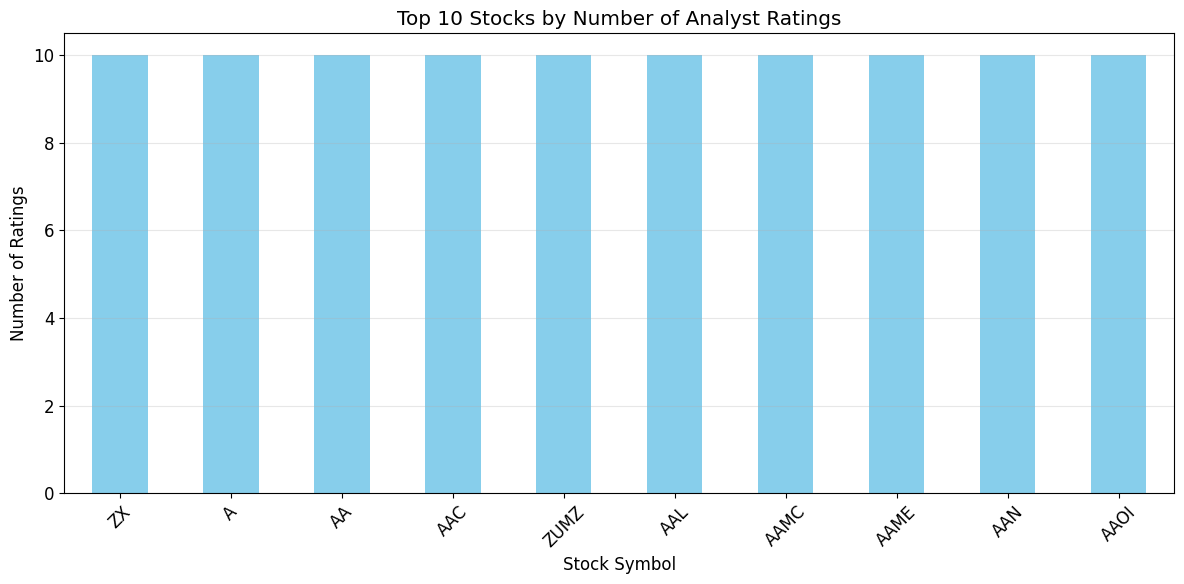


Total unique stocks: 6204

📅 Ratings Date Distribution:


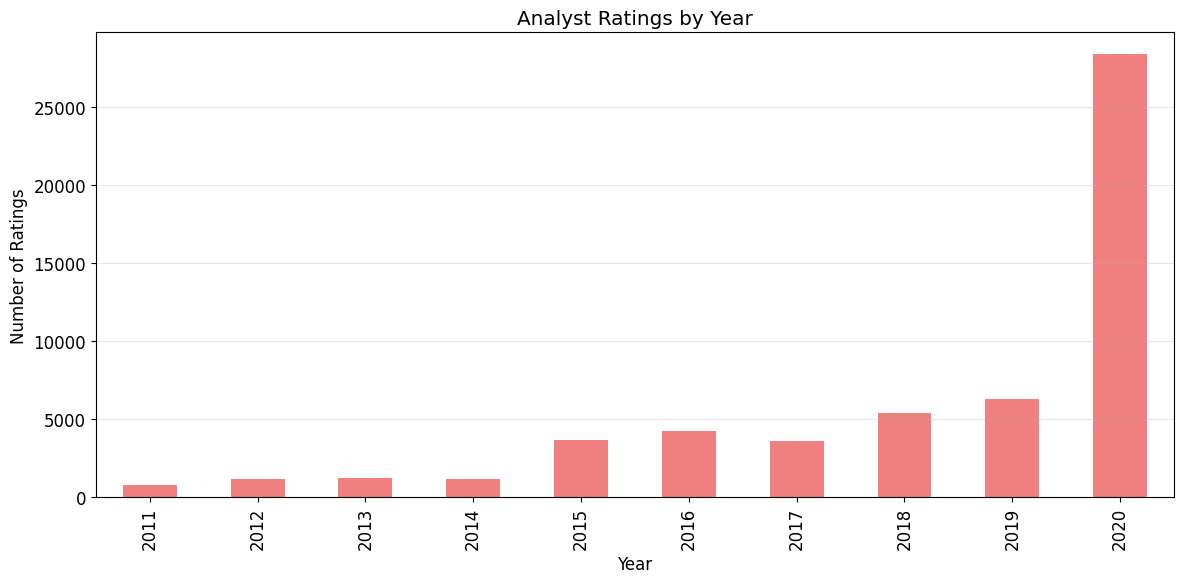

In [18]:
# Explore analyst ratings data
if ratings_df is not None:
    # Check for stock column
    if 'stock' in ratings_df.columns:
        print("📈 Stock Distribution in Ratings Data:")
        stock_counts = ratings_df['stock'].value_counts().head(10)
        
        plt.figure(figsize=(12, 6))
        stock_counts.head(10).plot(kind='bar', color='skyblue')
        plt.title('Top 10 Stocks by Number of Analyst Ratings')
        plt.xlabel('Stock Symbol')
        plt.ylabel('Number of Ratings')
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"\nTotal unique stocks: {ratings_df['stock'].nunique()}")
        
    # Date distribution
    print("\n📅 Ratings Date Distribution:")
    ratings_df['year'] = ratings_df['date'].dt.year
    yearly_counts = ratings_df['year'].value_counts().sort_index()
    
    plt.figure(figsize=(12, 6))
    yearly_counts.plot(kind='bar', color='lightcoral')
    plt.title('Analyst Ratings by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Ratings')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

In [19]:
# Load and explore stock data
print("📈 Loading Stock Data...")

stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']
stock_data = {}

for stock in stocks:
    stock_df = loader.load_stock_data(stock)
    if stock_df is not None:
        stock_data[stock] = stock_df
        print(f"✅ {stock}: {len(stock_df)} records, {stock_df['date'].min()} to {stock_df['date'].max()}")
    else:
        print(f"❌ Failed to load {stock}")

print(f"\n📊 Successfully loaded {len(stock_data)} out of {len(stocks)} stocks")

📈 Loading Stock Data...
✅ Loaded AAPL: 3774 records
✅ AAPL: 3774 records, 2009-01-02 00:00:00 to 2023-12-29 00:00:00
✅ Loaded AMZN: 3774 records
✅ AMZN: 3774 records, 2009-01-02 00:00:00 to 2023-12-29 00:00:00
✅ Loaded GOOG: 3774 records
✅ GOOG: 3774 records, 2009-01-02 00:00:00 to 2023-12-29 00:00:00
✅ Loaded META: 2923 records
✅ META: 2923 records, 2012-05-18 00:00:00 to 2023-12-29 00:00:00
✅ Loaded MSFT: 3774 records
✅ MSFT: 3774 records, 2009-01-02 00:00:00 to 2023-12-29 00:00:00
✅ Loaded NVDA: 3774 records
✅ NVDA: 3774 records, 2009-01-02 00:00:00 to 2023-12-29 00:00:00

📊 Successfully loaded 6 out of 6 stocks


📋 AAPL Stock Data Info:
Columns: ['date', 'close', 'high', 'low', 'open', 'volume']
Date range: 2009-01-02 00:00:00 to 2023-12-29 00:00:00

📊 Basic Statistics:


,close,high,low,open,volume
count,3774.000000,3774.000000,3774.000000,3774.000000,3.774000e+03
mean,53.841169,54.383801,53.247465,53.801628,2.640640e+08
std,55.064042,55.627235,54.440128,55.009182,2.345629e+08
min,2.345299,2.459265,2.345299,2.380989,2.404830e+07
25%,15.050355,15.183043,14.901886,15.007580,9.581845e+07
50%,26.975808,27.168844,26.836844,27.010205,1.667348e+08
75%,74.664204,75.252383,73.553555,74.127927,3.777410e+08
max,196.256592,197.752460,195.156944,196.167437,1.880998e+09


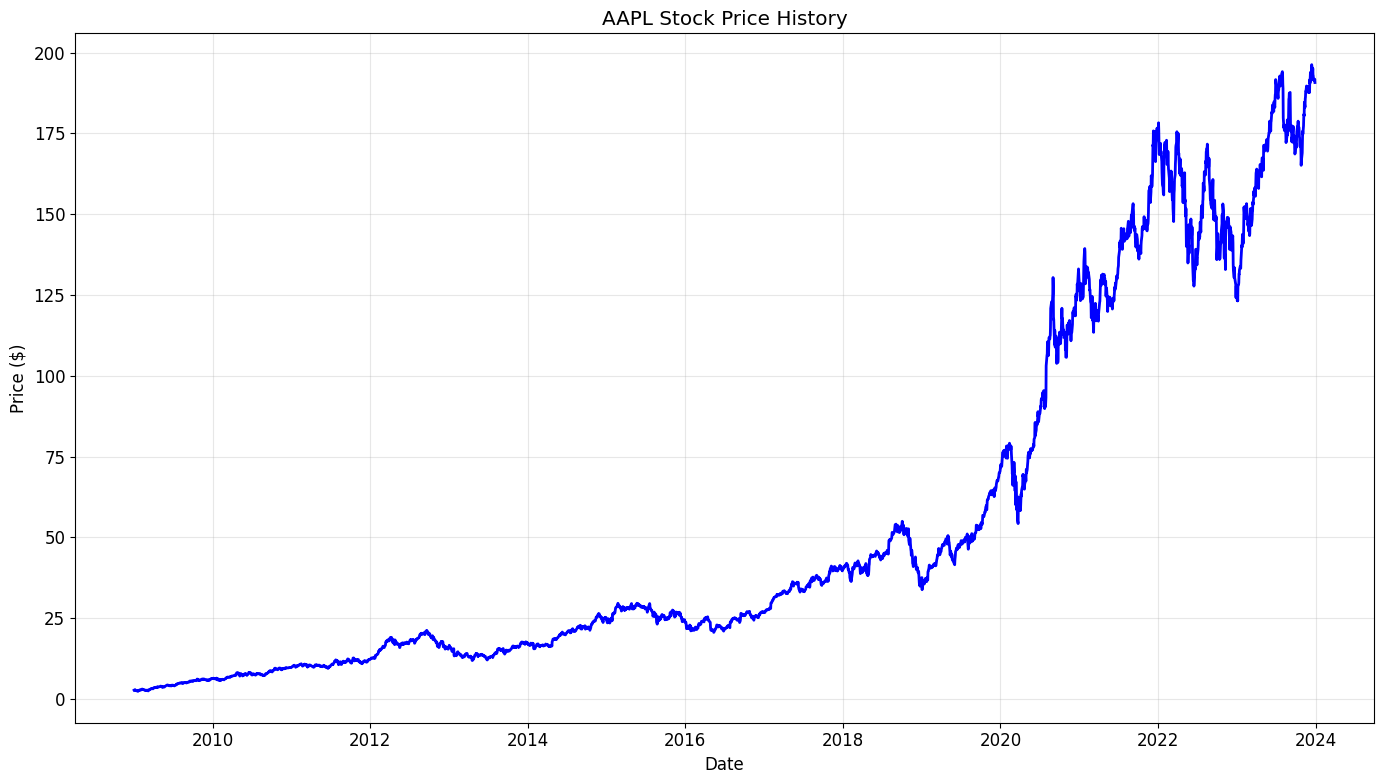

In [20]:
# Explore one stock's data in detail
if 'AAPL' in stock_data:
    sample_stock = stock_data['AAPL']
    print("📋 AAPL Stock Data Info:")
    print(f"Columns: {list(sample_stock.columns)}")
    print(f"Date range: {sample_stock['date'].min()} to {sample_stock['date'].max()}")
    
    # Show basic statistics
    numeric_cols = sample_stock.select_dtypes(include=[np.number]).columns
    print(f"\n📊 Basic Statistics:")
    display(sample_stock[numeric_cols].describe())
    
    # Plot stock price history
    plt.figure(figsize=(14, 8))
    
    # Find price column
    price_cols = [col for col in sample_stock.columns if any(x in col.lower() for x in ['close', 'price', 'adj'])]
    if price_cols:
        price_col = price_cols[0]
        plt.plot(sample_stock['date'], sample_stock[price_col], linewidth=2, color='blue')
        plt.title(f'AAPL Stock Price History')
        plt.xlabel('Date')
        plt.ylabel('Price ($)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

😊 Performing Sentiment Analysis...
🔍 Performing sentiment analysis...
✅ Sentiment analysis completed
Sentiment distribution:
sentiment_label
neutral     760
positive    185
negative     55
Name: count, dtype: int64
✅ Sentiment analysis completed on sample data

🎭 Sentiment Distribution:
sentiment_label
neutral     760
positive    185
negative     55
Name: count, dtype: int64


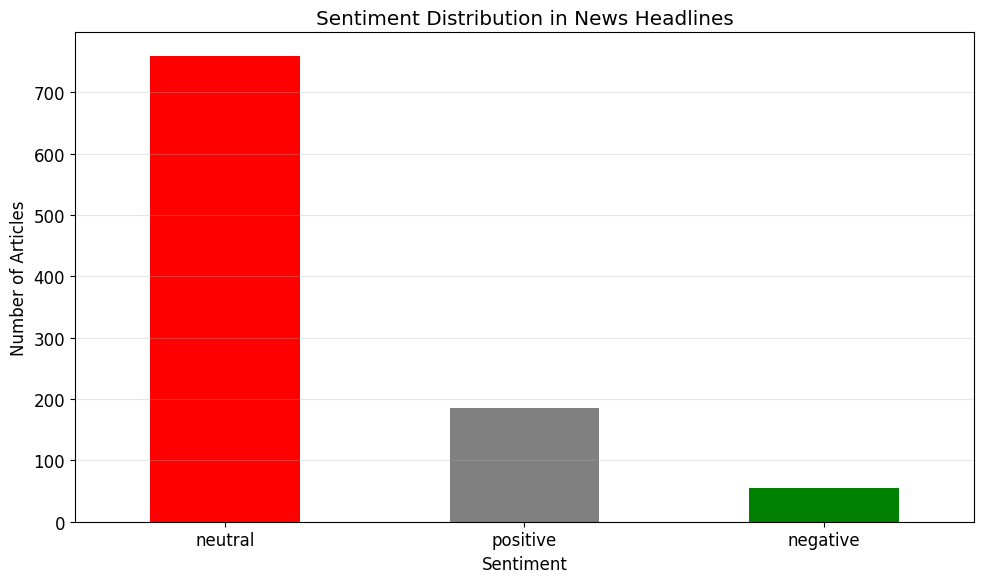

In [21]:
# Section 2: Sentiment Analysis

print("😊 Performing Sentiment Analysis...")

# Initialize sentiment analyzer
sentiment_analyzer = SentimentAnalyzer()

# Analyze sentiment on a sample of ratings
sample_ratings = ratings_df.head(1000).copy()  # Use sample for demonstration
ratings_with_sentiment = sentiment_analyzer.analyze_dataframe(sample_ratings)

print("✅ Sentiment analysis completed on sample data")

# Show sentiment distribution
sentiment_dist = ratings_with_sentiment['sentiment_label'].value_counts()
print(f"\n🎭 Sentiment Distribution:")
print(sentiment_dist)

# Visualize sentiment distribution
plt.figure(figsize=(10, 6))
colors = ['red', 'gray', 'green']
sentiment_dist.plot(kind='bar', color=colors)
plt.title('Sentiment Distribution in News Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

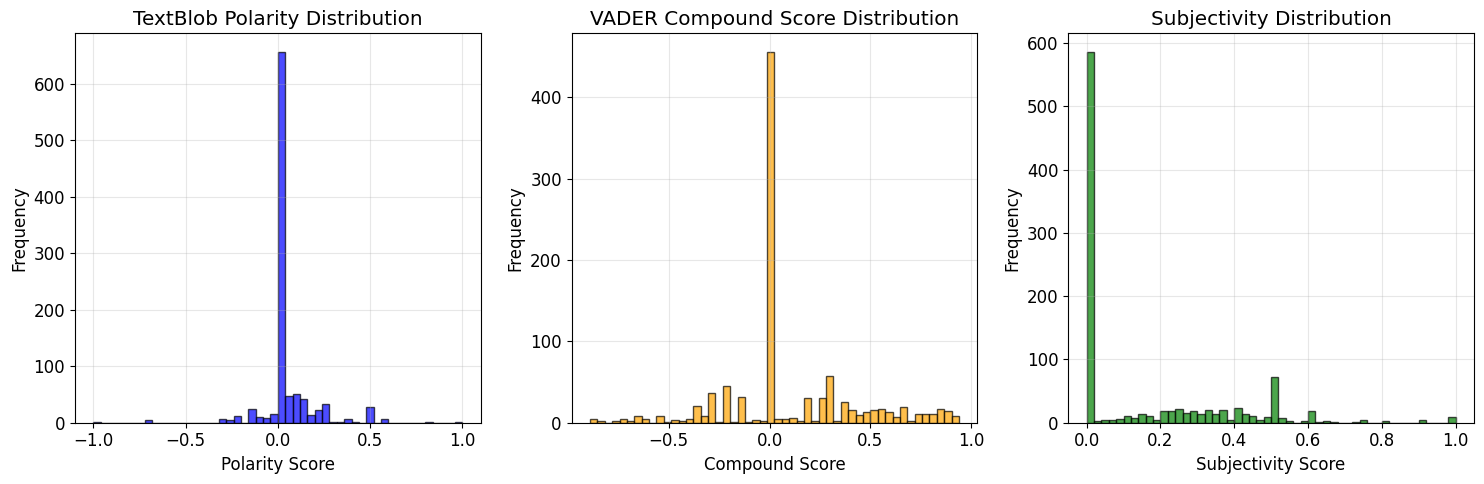

📊 Sentiment Statistics:
TextBlob Polarity - Mean: 0.039, Std: 0.146
VADER Compound - Mean: 0.101, Std: 0.338


In [22]:
# Explore sentiment scores distribution
plt.figure(figsize=(15, 5))

# Polarity distribution
plt.subplot(1, 3, 1)
plt.hist(ratings_with_sentiment['sentiment_polarity'], bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('TextBlob Polarity Distribution')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# VADER compound distribution
plt.subplot(1, 3, 2)
plt.hist(ratings_with_sentiment['vader_compound'], bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('VADER Compound Score Distribution')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

# Subjectivity distribution
plt.subplot(1, 3, 3)
plt.hist(ratings_with_sentiment['sentiment_subjectivity'], bins=50, alpha=0.7, color='green', edgecolor='black')
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Sentiment Statistics:")
print(f"TextBlob Polarity - Mean: {ratings_with_sentiment['sentiment_polarity'].mean():.3f}, Std: {ratings_with_sentiment['sentiment_polarity'].std():.3f}")
print(f"VADER Compound - Mean: {ratings_with_sentiment['vader_compound'].mean():.3f}, Std: {ratings_with_sentiment['vader_compound'].std():.3f}")

In [30]:
# Section 3: Complete Analysis Pipeline for One Stock

def analyze_single_stock(stock_symbol, ratings_data, full_analysis=True):
    """Complete analysis for a single stock"""
    print(f"\n{'='*60}")
    print(f"🔍 COMPLETE ANALYSIS: {stock_symbol}")
    print(f"{'='*60}")
    
    loader = DataLoader(data_path="../data")
    sentiment_analyzer = SentimentAnalyzer()
    correlation_calculator = CorrelationCalculator()
    visualizer = StockVisualizer()
    
    try:
        # 1. Load stock data
        stock_df = loader.load_stock_data(stock_symbol)
        if stock_df is None:
            return None

        # Convert stock dates to UTC
        if 'date' in stock_df.columns:
            stock_df['date'] = pd.to_datetime(stock_df['date'], errors='coerce', utc=True)

        # 2. Filter ratings for this stock
        if 'stock' in ratings_data.columns:
            stock_ratings = ratings_data[ratings_data['stock'].str.upper() == stock_symbol.upper()].copy()
            if len(stock_ratings) == 0:
                print(f"⚠ No specific ratings for {stock_symbol}, using all ratings")
                stock_ratings = ratings_data.copy()
        else:
            stock_ratings = ratings_data.copy()
        
        print(f"📰 Using {len(stock_ratings)} ratings for analysis")

        # Convert rating/news dates to UTC
        if 'date' in stock_ratings.columns:
            stock_ratings['date'] = pd.to_datetime(stock_ratings['date'], errors='coerce', utc=True)
        
        # 3. Align dates
        news_aligned, stock_aligned = loader.align_dates(stock_ratings, stock_df)

        # Convert aligned dates to UTC
        news_aligned['date'] = pd.to_datetime(news_aligned['date'], errors='coerce', utc=True)
        stock_aligned['date'] = pd.to_datetime(stock_aligned['date'], errors='coerce', utc=True)

        if len(news_aligned) == 0 or len(stock_aligned) == 0:
            print("❌ No overlapping dates between news and stock data")
            return None
        
        print(f"✅ Date alignment successful:")
        print(f"   - News records: {len(news_aligned)}")
        print(f"   - Stock records: {len(stock_aligned)}")
        print(f"   - Date range: {news_aligned['date'].min()} to {news_aligned['date'].max()}")
        
        # 4. Calculate returns
        stock_with_returns = correlation_calculator.calculate_daily_returns(stock_aligned)
        
        # 5. Sentiment analysis
        print("🔍 Performing sentiment analysis on aligned data...")
        news_with_sentiment = sentiment_analyzer.analyze_dataframe(news_aligned)
        daily_sentiment = sentiment_analyzer.aggregate_daily_sentiment(news_with_sentiment)
        
        # 6. Combine data
        combined_data = pd.merge(daily_sentiment, stock_with_returns, on='date', how='inner')
        print(f"✅ Combined data: {len(combined_data)} days with both sentiment and returns")
        
        if len(combined_data) < 3:
            print("❌ Insufficient data for correlation analysis")
            return None
        
        # 7. Calculate correlations
        print("📈 Calculating correlations...")
        results = correlation_calculator.calculate_correlations(combined_data)
        
        if results:
            correlation_calculator.print_results(results, stock_symbol)
        else:
            print("❌ Could not calculate correlations")
            return None
        
        # 8. Create visualizations if enough data
        if full_analysis and len(combined_data) >= 5:
            print("🎨 Creating visualizations...")
            visualizer.create_dashboard(combined_data, stock_symbol)
        
        # 9. Return results
        return {
            'combined_data': combined_data,
            'correlation_results': results,
            'news_count': len(news_aligned),
            'analysis_period': f"{combined_data['date'].min()} to {combined_data['date'].max()}"
        }
        
    except Exception as e:
        print(f"❌ Error analyzing {stock_symbol}: {e}")
        import traceback
        traceback.print_exc()
        return None


# Test with one stock
print("🧪 Testing analysis pipeline with AAPL...")
aapl_results = analyze_single_stock('AAPL', ratings_df, full_analysis=True)



🧪 Testing analysis pipeline with AAPL...

🔍 COMPLETE ANALYSIS: AAPL
🔍 Data folder: c:\Users\eyaze\OneDrive\Desktop\price-move-prediction-challenge-week1\data
✅ Loaded AAPL: 3774 records
📰 Using 10 ratings for analysis
📅 Date alignment started...
   News dates: 2020-06-09 00:00:00+00:00 to 2020-06-10 00:00:00+00:00 (tz: aware)
   Stock dates: 2009-01-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00 (tz: aware)
   Converting news dates to timezone-naive...
   Converting stock dates to timezone-naive...
✅ Date alignment: 2020-06-09 00:00:00 to 2020-06-10 00:00:00
   News records: 10
   Stock records: 2
✅ Date alignment successful:
   - News records: 10
   - Stock records: 2
   - Date range: 2020-06-09 00:00:00+00:00 to 2020-06-10 00:00:00+00:00
📈 Daily returns calculated: 1 valid returns
🔍 Performing sentiment analysis on aligned data...
🔍 Performing sentiment analysis...
✅ Sentiment analysis completed
Sentiment distribution:
sentiment_label
neutral     7
positive    3
Name: count, dtype: i

In [24]:
# Section 4: Analyze All Stocks

print("🚀 ANALYZING ALL STOCKS")
print("=" * 50)

stocks = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']
all_results = {}

for stock in stocks:
    print(f"\n📊 Processing {stock}...")
    result = analyze_single_stock(stock, ratings_df, full_analysis=True)
    if result:
        all_results[stock] = result
        print(f"✅ {stock} analysis completed successfully!")
    else:
        print(f"❌ {stock} analysis failed")
    
    print("-" * 40)

print(f"\n🎉 ANALYSIS SUMMARY:")
print(f"✅ Successful: {len(all_results)} stocks")
print(f"❌ Failed: {len(stocks) - len(all_results)} stocks")

🚀 ANALYZING ALL STOCKS

📊 Processing AAPL...

🔍 COMPLETE ANALYSIS: AAPL
🔍 Data folder: c:\Users\eyaze\OneDrive\Desktop\price-move-prediction-challenge-week1\data
✅ Loaded AAPL: 3774 records
📰 Using 10 ratings for analysis
📅 Date alignment started...
   News dates: 2020-06-09 00:00:00 to 2020-06-10 00:00:00 (tz: naive)
   Stock dates: 2009-01-02 00:00:00 to 2023-12-29 00:00:00 (tz: naive)
✅ Date alignment: 2020-06-09 00:00:00 to 2020-06-10 00:00:00
   News records: 10
   Stock records: 2
✅ Date alignment successful:
   - News records: 10
   - Stock records: 2
   - Date range: 2020-06-09 00:00:00 to 2020-06-10 00:00:00
📈 Daily returns calculated: 1 valid returns
🔍 Performing sentiment analysis on aligned data...
🔍 Performing sentiment analysis...
✅ Sentiment analysis completed
Sentiment distribution:
sentiment_label
neutral     7
positive    3
Name: count, dtype: int64
📊 Aggregated sentiment for 2 days
✅ Combined data: 2 days with both sentiment and returns
❌ Insufficient data for correl

📊 COMPARATIVE ANALYSIS ACROSS ALL STOCKS
📋 Comparison Results:


,Stock,Days_Analyzed,Polarity_Correlation,Polarity_P_Value,VADER_Correlation,VADER_P_Value,News_Articles,Analysis_Period
0,GOOG,4,-0.8037,0.1963,-0.8701,0.1299,10,2020-06-04 00:00:00 to 2020-06-10 00:00:00
1,META,1984,-0.0003,0.9890,-0.0074,0.7426,54852,2012-05-18 00:00:00 to 2020-06-11 00:00:00
2,MSFT,2225,-0.0117,0.5802,0.0288,0.1743,55987,2011-04-27 00:00:00 to 2020-06-11 00:00:00
3,NVDA,4,0.1757,0.8243,0.5227,0.4773,10,2020-06-02 00:00:00 to 2020-06-10 00:00:00


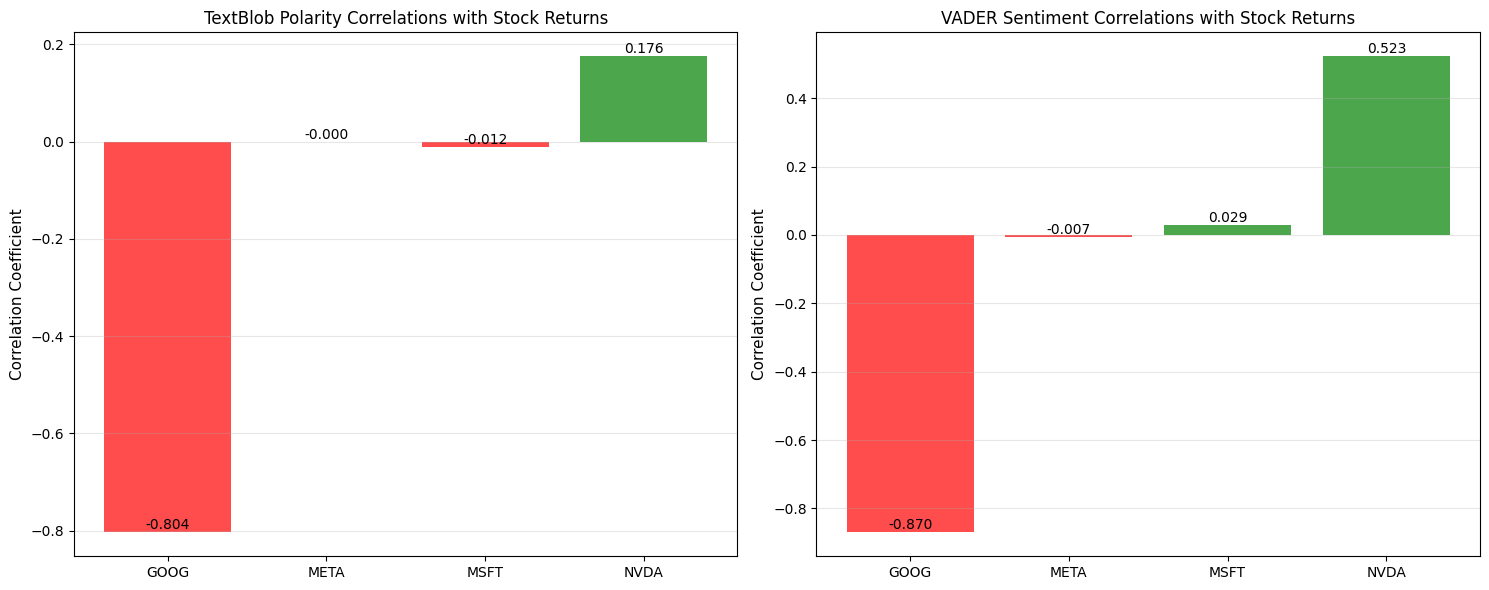


📈 Statistical Significance Summary:
Stocks with statistically significant correlations (p < 0.05): 0


In [26]:
# Section 5: Comparative Analysis

if all_results:
    print("📊 COMPARATIVE ANALYSIS ACROSS ALL STOCKS")
    print("=" * 50)
    
    # Create comparison dataframe
    comparison_data = []
    
    for stock, results in all_results.items():
        if results and 'correlation_results' in results:
            corr_data = results['correlation_results']['correlations']
            summary = results['correlation_results']['summary']
            
            comparison_data.append({
                'Stock': stock,
                'Days_Analyzed': summary['total_days'],
                'Polarity_Correlation': corr_data['pearson_polarity'][0],
                'Polarity_P_Value': corr_data['pearson_polarity'][1],
                'VADER_Correlation': corr_data['pearson_vader'][0],
                'VADER_P_Value': corr_data['pearson_vader'][1],
                'News_Articles': results['news_count'],
                'Analysis_Period': results['analysis_period']
            })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    print("📋 Comparison Results:")
    display(comparison_df.round(4))
    
    # Visualize correlation comparison
    if len(comparison_df) > 1:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Polarity correlations
        bars1 = ax1.bar(comparison_df['Stock'], comparison_df['Polarity_Correlation'], 
                       color=['green' if x > 0 else 'red' for x in comparison_df['Polarity_Correlation']],
                       alpha=0.7)
        ax1.set_title('TextBlob Polarity Correlations with Stock Returns')
        ax1.set_ylabel('Correlation Coefficient')
        ax1.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for bar in bars1:
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom')
        
        # VADER correlations
        bars2 = ax2.bar(comparison_df['Stock'], comparison_df['VADER_Correlation'],
                       color=['green' if x > 0 else 'red' for x in comparison_df['VADER_Correlation']],
                       alpha=0.7)
        ax2.set_title('VADER Sentiment Correlations with Stock Returns')
        ax2.set_ylabel('Correlation Coefficient')
        ax2.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for bar in bars2:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom')
        
        plt.tight_layout()
        plt.show()
        
        # Statistical significance
        print("\n📈 Statistical Significance Summary:")
        significant_stocks = comparison_df[
            (comparison_df['Polarity_P_Value'] < 0.05) | 
            (comparison_df['VADER_P_Value'] < 0.05)
        ]
        
        print(f"Stocks with statistically significant correlations (p < 0.05): {len(significant_stocks)}")
        if len(significant_stocks) > 0:
            print("Significant stocks:")
            for _, row in significant_stocks.iterrows():
                sig_metrics = []
                if row['Polarity_P_Value'] < 0.05:
                    sig_metrics.append(f"Polarity (p={row['Polarity_P_Value']:.4f})")
                if row['VADER_P_Value'] < 0.05:
                    sig_metrics.append(f"VADER (p={row['VADER_P_Value']:.4f})")
                print(f"  - {row['Stock']}: {', '.join(sig_metrics)}")

In [27]:
# Section 6: Advanced Analysis and Insights

if all_results:
    print("🔍 ADVANCED INSIGHTS AND ANALYSIS")
    print("=" * 50)
    
    # Overall correlation strength
    avg_polarity_corr = comparison_df['Polarity_Correlation'].abs().mean()
    avg_vader_corr = comparison_df['VADER_Correlation'].abs().mean()
    
    print(f"📊 Average Absolute Correlation Strength:")
    print(f"   TextBlob Polarity: {avg_polarity_corr:.4f}")
    print(f"   VADER Sentiment: {avg_vader_corr:.4f}")
    
    # Best and worst correlations
    best_polarity = comparison_df.loc[comparison_df['Polarity_Correlation'].abs().idxmax()]
    best_vader = comparison_df.loc[comparison_df['VADER_Correlation'].abs().idxmax()]
    
    print(f"\n🏆 Strongest Correlations:")
    print(f"   TextBlob: {best_polarity['Stock']} (r = {best_polarity['Polarity_Correlation']:.4f})")
    print(f"   VADER: {best_vader['Stock']} (r = {best_vader['VADER_Correlation']:.4f})")
    
    # Correlation interpretation
    print(f"\n💡 Interpretation:")
    if avg_polarity_corr > 0.5:
        print("   Strong relationship between news sentiment and stock returns")
    elif avg_polarity_corr > 0.3:
        print("   Moderate relationship between news sentiment and stock returns")
    elif avg_polarity_corr > 0.1:
        print("   Weak relationship between news sentiment and stock returns")
    else:
        print("   Very weak or no relationship detected")
    
    # Data quality assessment
    total_news_articles = sum([results['news_count'] for results in all_results.values()])
    avg_days_analyzed = comparison_df['Days_Analyzed'].mean()
    
    print(f"\n📈 Data Quality Assessment:")
    print(f"   Total news articles analyzed: {total_news_articles:,}")
    print(f"   Average days analyzed per stock: {avg_days_analyzed:.1f}")
    print(f"   Stocks with sufficient data (>10 days): {len(comparison_df[comparison_df['Days_Analyzed'] > 10])}")

🔍 ADVANCED INSIGHTS AND ANALYSIS
📊 Average Absolute Correlation Strength:
   TextBlob Polarity: 0.2479
   VADER Sentiment: 0.3572

🏆 Strongest Correlations:
   TextBlob: GOOG (r = -0.8037)
   VADER: GOOG (r = -0.8701)

💡 Interpretation:
   Weak relationship between news sentiment and stock returns

📈 Data Quality Assessment:
   Total news articles analyzed: 110,859
   Average days analyzed per stock: 1054.2
   Stocks with sufficient data (>10 days): 2


In [28]:
# Section 7: Export Results

print("💾 EXPORTING RESULTS")
print("=" * 50)

# Create results directory
results_dir = "../results"
os.makedirs(results_dir, exist_ok=True)

if all_results:
    # Save comparison results
    comparison_file = os.path.join(results_dir, "stock_correlation_comparison.csv")
    comparison_df.to_csv(comparison_file, index=False)
    print(f"✅ Comparison results saved: {comparison_file}")
    
    # Save detailed results for each stock
    for stock, results in all_results.items():
        if 'combined_data' in results:
            stock_file = os.path.join(results_dir, f"{stock}_detailed_results.csv")
            results['combined_data'].to_csv(stock_file, index=False)
            print(f"✅ {stock} detailed results saved: {stock_file}")
    
    # Create summary report
    summary_file = os.path.join(results_dir, "analysis_summary.txt")
    with open(summary_file, 'w') as f:
        f.write("NEWS SENTIMENT vs STOCK RETURNS ANALYSIS SUMMARY\n")
        f.write("=" * 50 + "\n\n")
        f.write(f"Analysis Date: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write(f"Stocks Analyzed: {len(all_results)}\n")
        f.write(f"Total News Articles: {total_news_articles:,}\n\n")
        
        f.write("CORRELATION RESULTS:\n")
        f.write("-" * 30 + "\n")
        for _, row in comparison_df.iterrows():
            f.write(f"{row['Stock']}:\n")
            f.write(f"  TextBlob Correlation: {row['Polarity_Correlation']:.4f} (p={row['Polarity_P_Value']:.4f})\n")
            f.write(f"  VADER Correlation: {row['VADER_Correlation']:.4f} (p={row['VADER_P_Value']:.4f})\n")
            f.write(f"  Days Analyzed: {row['Days_Analyzed']}\n\n")
    
    print(f"✅ Summary report saved: {summary_file}")
    print(f"📁 All results saved in: {results_dir}")

print("\n🎉 NOTEBOOK EXECUTION COMPLETED!")

💾 EXPORTING RESULTS
✅ Comparison results saved: ../results\stock_correlation_comparison.csv
✅ GOOG detailed results saved: ../results\GOOG_detailed_results.csv
✅ META detailed results saved: ../results\META_detailed_results.csv
✅ MSFT detailed results saved: ../results\MSFT_detailed_results.csv
✅ NVDA detailed results saved: ../results\NVDA_detailed_results.csv
✅ Summary report saved: ../results\analysis_summary.txt
📁 All results saved in: ../results

🎉 NOTEBOOK EXECUTION COMPLETED!
